<h1 style="text-align:center">Undamped Response to Harmonic Direct-Force Inputs</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpring_DirectForce_Horiz.png" alt="A Mass-Spring-Damper System" width=50%></a><br>
    <strong> Figure 1: A Mass-Spring System </strong>
</p>

This notebook examines the frequency response of a simple mass-spring system like the one shown in Figure 1 to a harmonic, direct-force input.

The equation of motion for the system is:

<!-- the \quad commmand just adds a space in the math mode -->
$ \quad m \ddot{x} + kx = f $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + \omega_n^2x = \frac{f}{m}$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

In [3]:
# Import the plotting functions 
import matplotlib.pyplot as plt 

In [4]:
# Define the System Parameters
m = 1.0                 # kg
k = (2.0 * np.pi)**2.      # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)       # Natural Frequency (rad/s)

Let's use the closed-form, steady-state solution we developed in lecture:

Assume:

$ \quad f(t) = \bar{f} \sin{\omega t} $

Then, the solution $x(t)$ should have the form:

$ \quad x(t) = \bar{x} \sin{\omega t} $

We can then find the amplitude of the frequency response, $ \bar{x} $, as a function of of the frequency of the input, $ \omega $, and the amplitude of the force, $ \bar{f} $. 

$ \quad \bar{x} = \frac{\bar{f}}{m} \left(\frac{1}{\omega_n^2 - \omega^2}\right) $

So, 

$ \quad x(t) = \frac{\bar{f}}{m} \left(\frac{1}{\omega_n^2 - \omega^2}\right)  \sin{\omega t} $

or 

$ \quad x(t) = \frac{1}{m} \left(\frac{1}{\omega_n^2 - \omega^2} \right) f(t) $

So, $ \left(\frac{1/m}{\omega_n^2 - \omega^2} \right) $ gives us the relationship between the input $ f(t) $ and the system response $ x(t) $. Let's plot that for a range of frequencies.

In [5]:
# Set up input parameters
w = np.linspace(1e-6, wn*3, 1000)            # Frequency range for freq response plot, 0-3x wn with 1000 points in-between

x_amp = (1/m) / (wn**2 - w**2)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(x_amp) >= 5)
x_amp[pos] = np.nan
w[pos] = np.nan

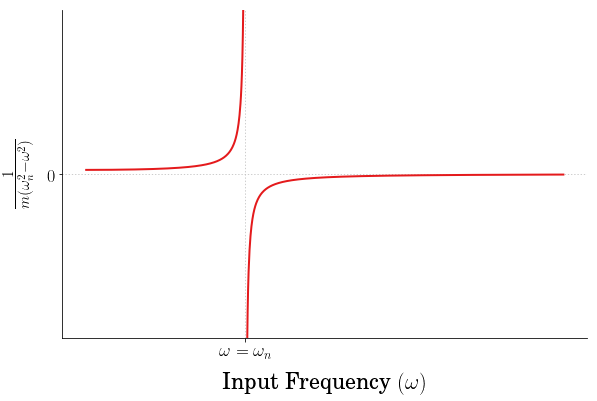

In [6]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Input Frequency $\left(\omega\right)$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylabel(r'$ \frac{1}{m\left(\omega_n^2 - \omega^2\right)} $',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-1.0,1.0)
plt.xticks([1],['$\omega = \omega_n$'])
plt.yticks([0])


plt.plot(w/wn,x_amp,linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython Notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_ForcedFreqResp_Amplitude.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Magnitude of the Response
We can also plot the magnitude of this.

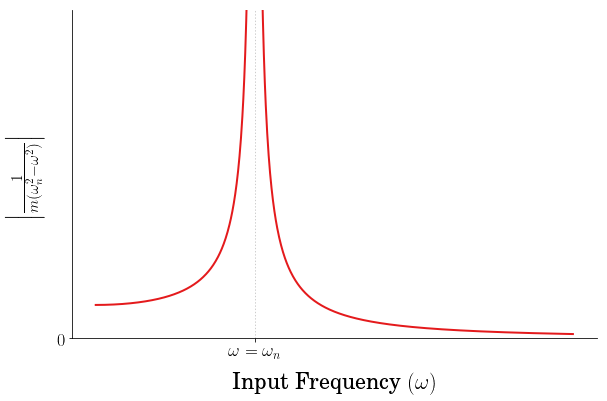

In [7]:
x_mag = np.abs(x_amp)

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Input Frequency $\left(\omega\right)$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylabel(r'$\left| \frac{1}{m\left(\omega_n^2 - \omega^2\right)\right|} $',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(0.0,0.25)
plt.xticks([1],[r'$\omega = \omega_n$'])
plt.yticks([0])


plt.plot(w/wn, x_mag, linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython Notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_ForcedFreqResp_Magnitude.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Normalization
Just as we did for seismic inputs, we can also normalize the frequency response by dividing both the numerator and denominator of the expression for $\bar{x}$ by the natural frequency $ \omega_n $. We find that:

$ \quad \bar{x} = \frac{\bar{f}}{m \omega_n^2 \left( 1 - \Omega^2\right)}$

As a final normalization step, we can normalize the amplitude by plotting $\frac{m \omega_n^2}{\bar{f}} \bar{x}$ as a function of $\Omega$.

In [8]:
# Set up input parameters
wnorm = np.linspace(0,4,500)            # Frequency range for freq response plot, 0-4 Omega with 500 points in-between

x_amp = 1 / ((wn**2 * m) * (1 - wnorm**2))
xnorm_amp = x_amp * (m * wn**2)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(xnorm_amp) >= 100)
xnorm_amp[pos] = np.nan
wnorm[pos] = np.nan

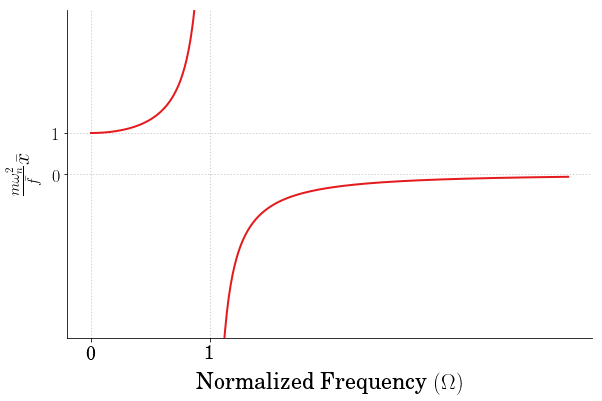

In [9]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega\right)$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylabel(r'$\frac{m \omega_n^2}{\bar{f}} \bar{x}$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-4.0,4.0)
plt.xticks([0,1],['0','1'])
plt.yticks([0,1])

plt.plot(wnorm,xnorm_amp,linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MassSpring_ForcedFreqResp_NormAmp.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Magnitude of the Response
We can also plot the magnitude of this.

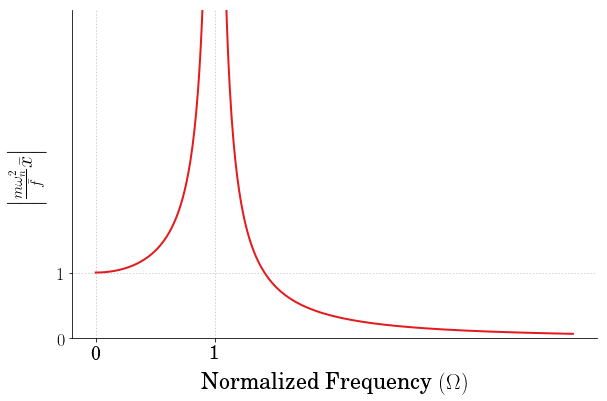

In [10]:
xnorm_mag = np.abs(xnorm_amp)

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.15,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega\right)$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylabel(r'$\left| \frac{m \omega_n^2}{\bar{f}} \bar{x} \right|$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(0.0,5.0)
plt.xticks([0,1],['0','1'])
plt.yticks([0,1])

plt.plot(wnorm, xnorm_mag, linewidth=2)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# savefig('MassSpring_ForcedFreqResp_NormMag.pdf',dpi=300)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [11]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))